In [ ]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q esda
!pip install -q splot

In [ ]:
# Bibliotecas
import geopandas as gpd
from libpysal.weights.contiguity import Queen
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_local_autocorrelation,lisa_cluster
import matplotlib.pyplot as plt

In [ ]:
# Leitura do arquivo
gdf = gpd.read_file("MT_indices.geojson")

In [ ]:
# Criação da matriz de pesos
weights = Queen.from_dataframe(gdf)
# Normalização da matriz
weights.transform = 'r'
W_matrix, ids = weights.full()

In [ ]:
# Cálculo do índice de Moran
moran = Moran(gdf['IVS'], weights)

In [ ]:
# Valor do índice
moran.I

0.35814511324063064

In [ ]:
# P-valor
print(f"P-valor: {moran.p_sim}")

P-valor: 0.001


In [ ]:
# Visualizando quadrantes
fig, ax = moran_scatterplot(moran, aspect_equal=True)
ax.set_xlabel('IVS')
ax.set_ylabel('Lag espacial')
plt.show()

In [ ]:
# Cálculo do índice de Moran local
local_moran = Moran_Local(gdf['IVS'], weights)

In [ ]:
# Visualizando quadrantes para Moran local
fig, ax = moran_scatterplot(local_moran, p=0.05)
ax.set_xlabel('IVS')
ax.set_ylabel('Lag espacial')
plt.show()

In [ ]:
# Visualizando mapa de espalhamento
lisa_cluster(local_moran, gdf, p=0.05, figsize=(12,8))
plt.show()

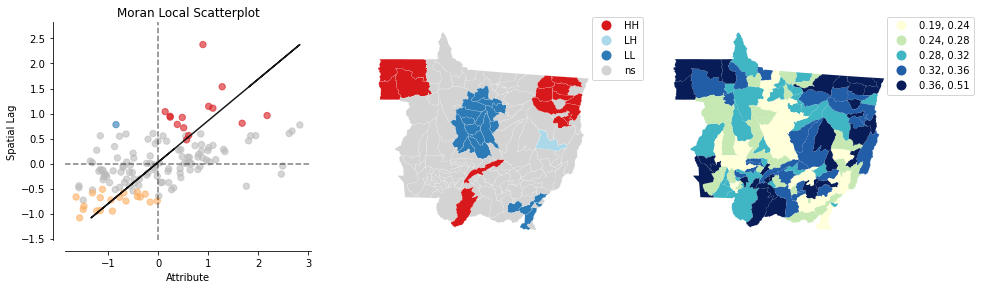

In [ ]:
# Plot de todas as informações com um comando apenas
plot_local_autocorrelation(local_moran, gdf, 'IVS')
plt.show()